In [111]:
import pandas as pd

from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import requests
import json
from datetime import datetime

import seaborn as sns
%matplotlib inline

file_path2 = Path("folder/subfolder/df_Merged.csv")
df_merged = pd.read_csv(file_path2, index_col="DATE")


file_path = Path("folder/subfolder/Percentage_change.csv")
df_percentchange = pd.read_csv(file_path, index_col="DATE")

file_path3 = Path("folder/subfolder/mcsimulation.csv")
mcsimulation = pd.read_csv(file_path3)


In [148]:
def Percentage_change():
    
    Percentage_change= df_percentchange.plot(title="Cryptocurrencies Percent Change Since 05/10/19", figsize=(18, 15))
 
    return Percentage_change

def Percentage_change_Correlation():
    
    Percentage_change_Correlation=df_percentchange.plot(kind='scatter', x='ETH', y='BTC', title="Percent Change Correlation - BTC vs. ETH")
    
    return Percentage_change_Correlation

def Eth_Btc_PriceChange():
    
    Eth_Btc_PriceChange = df_merged.plot(kind='scatter', x='ETH', y='BTC', title="Price Change Correlation - BTC vs ETH")

    return Eth_Btc_PriceChange 

def heat_map():
    correlation = df_merged.corr()
    heat_map = sns.heatmap(correlation, vmin=-1, vmax=1)
    
    return heat_map

def prices():
    
    prices = df_merged.plot.area(figsize = (12,12), subplots=True, title="Crypto Prices")

    return prices

def seven_daymean():
    
    # Plot a rolling 7-day mean of Crypto's closing prices
    seven_daymean = df_merged.rolling(window=7).mean().plot(figsize = (12,12), subplots=True)

    return seven_daymean

def seven_day_Deviation():
    
    # Plot a rolling 7-day std dev of Crypto's closing prices
    seven_day_Deviation = df_merged.rolling(window=7).std().plot(figsize = (12,12), subplots=True)

    return seven_day_Deviation

def Thirty_mean_Closing():
    
    # Plot a rolling 30-day mean of Crypto's closing prices
    Thirty_mean_Closing =df_merged.rolling(window=30).mean().plot(figsize = (12,12), subplots=True)

    return Thirty_mean_Closing

def Thirty_STD_Closing():
    
    # Plot a rolling 30-day std dev of Crypto's closing prices
    Thirty_STD_Closing = df_merged.rolling(window=30).std().plot(figsize = (12,12), subplots=True)

    return Thirty_STD_Closing

def Three_Month_mean():
    
    # Plot a rolling 180-day mean of Crypto's closing prices
    Three_Month_mean= df_merged.rolling(window=180).mean().plot(figsize = (12,12), subplots=True)

    return Three_Month_mean

def Three_Month_STD():
    
    # Plot a rolling 180-day std dev of Crypto's closing prices
    Three_Month_STD= df_merged.rolling(window=180).std().plot(figsize = (12,12), subplots=True)

    return Three_Month_STD

def McSim():
    
    McSim = mcsimulation.plot(legend=False, figsize=(15,15))
    
    return McSim

def currency_19():
    ax = mcsimulation.plot.hist( figsize=(10, 8), legend=False)
    
    return ax

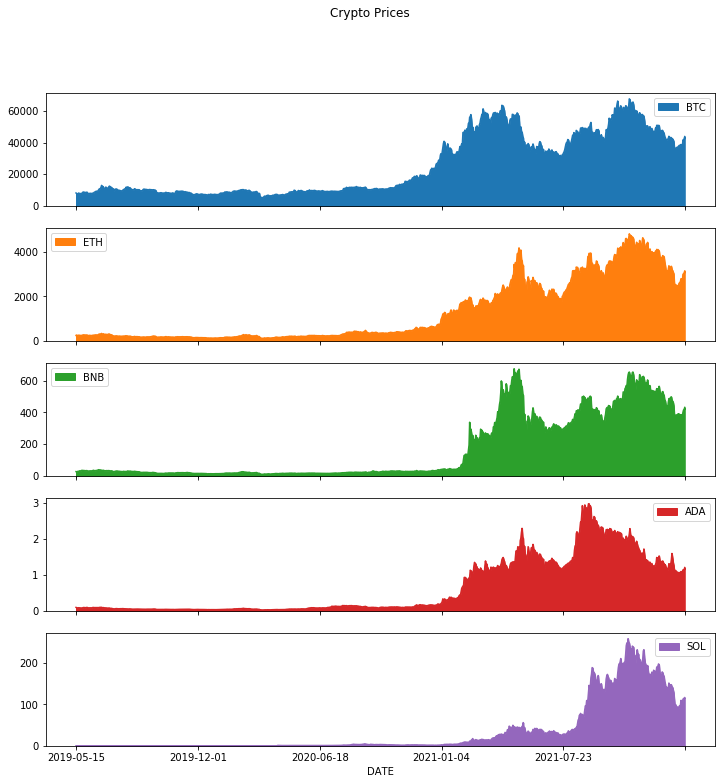

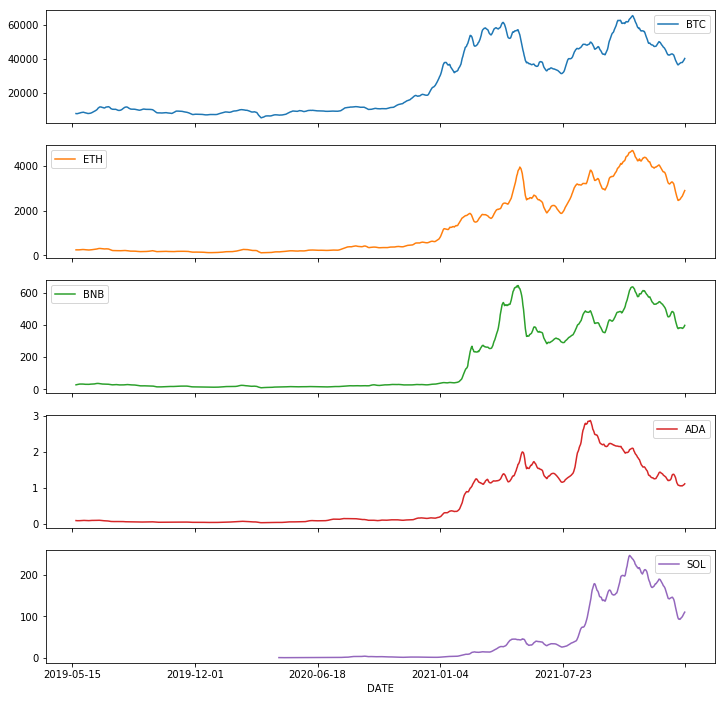

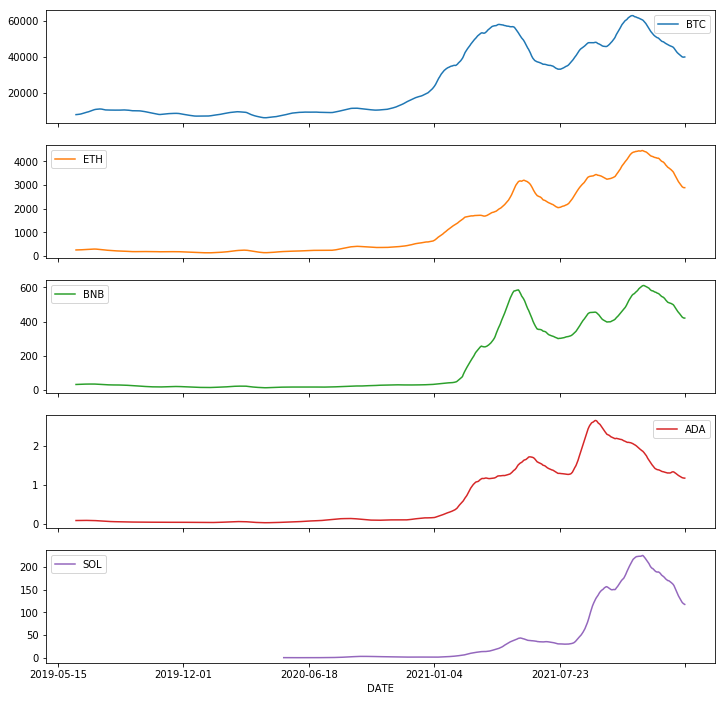

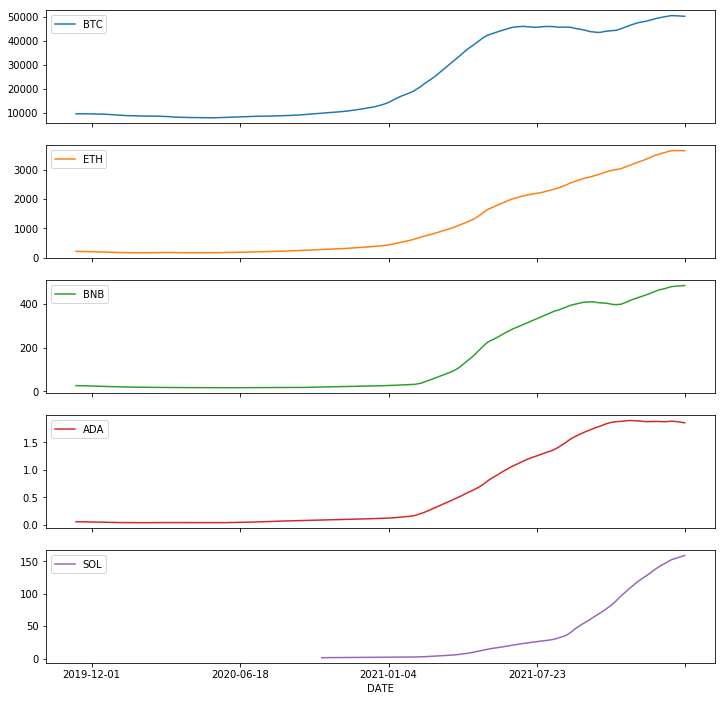

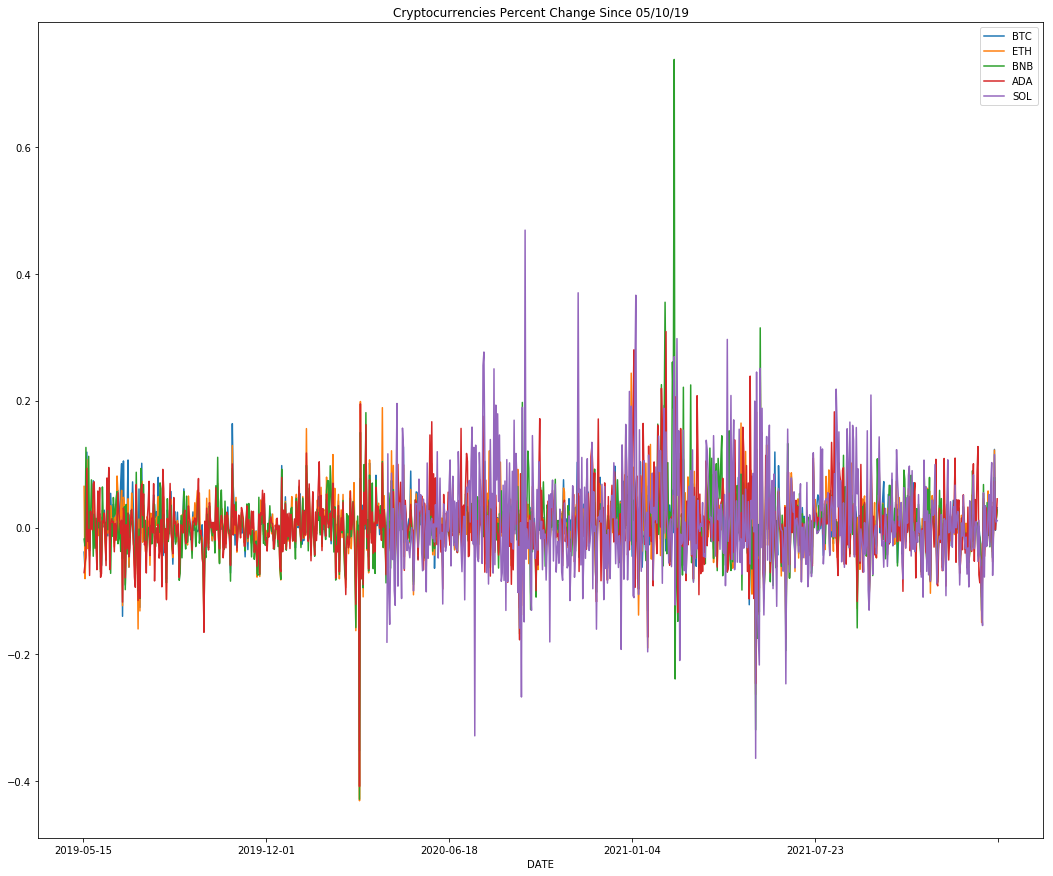

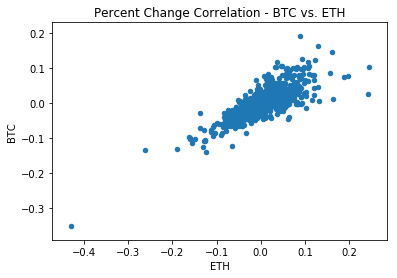

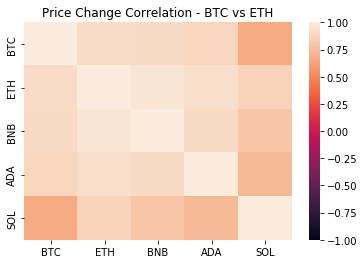

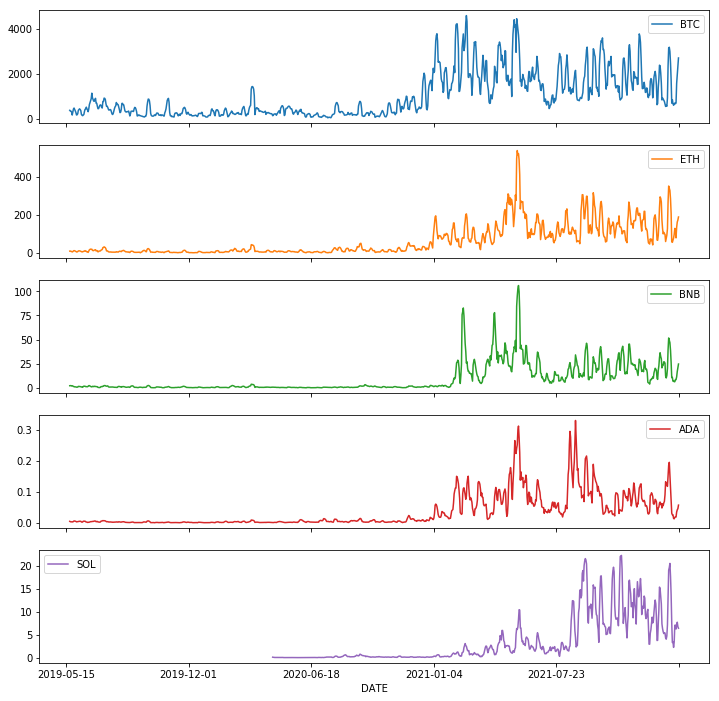

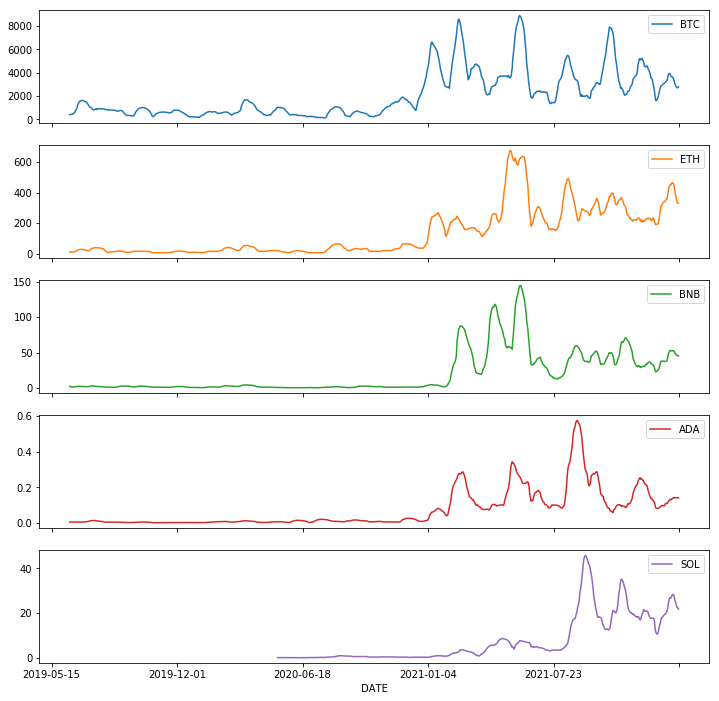

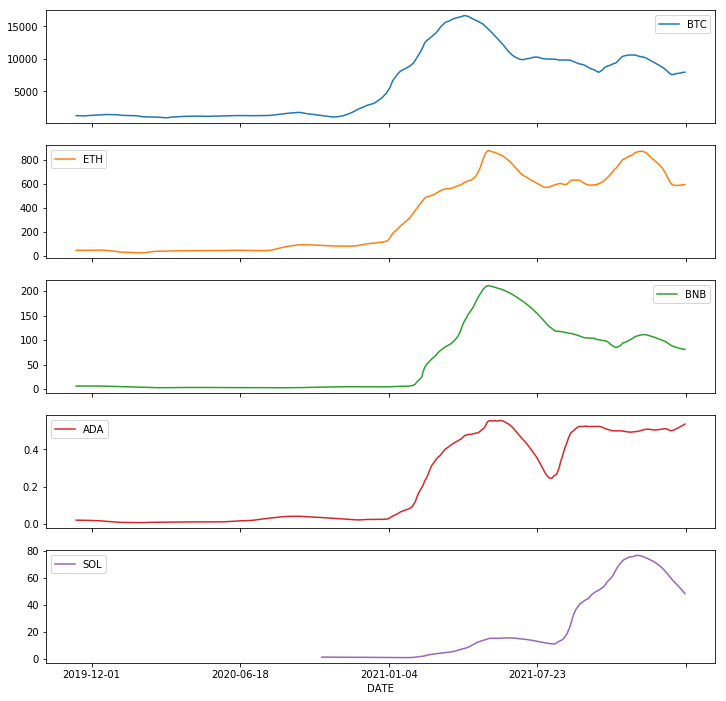

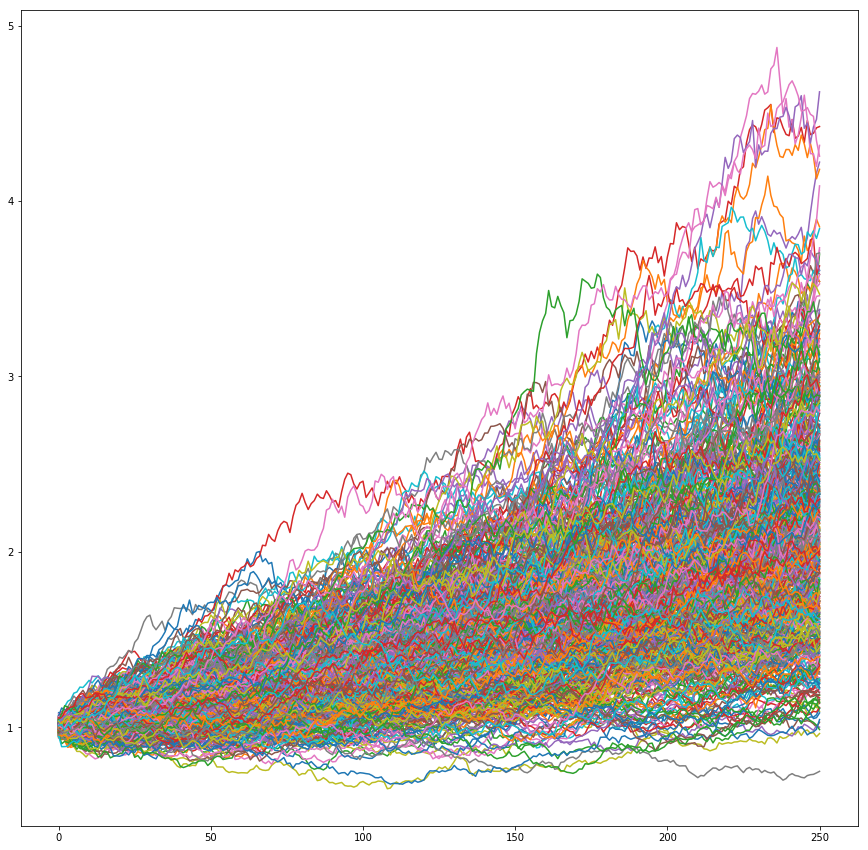

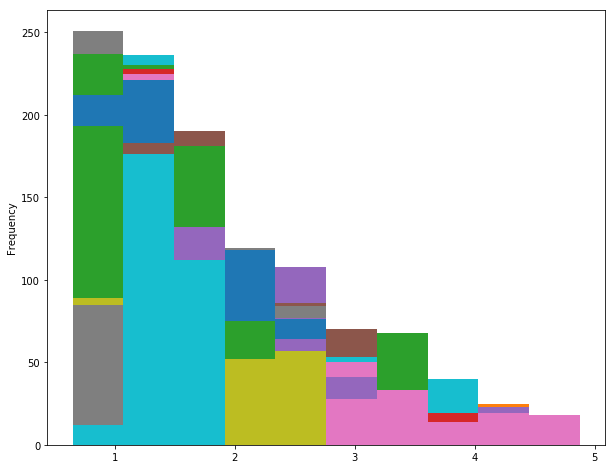

In [149]:
# Create a Title for the Dashboard

Info = pn.pane.Markdown(
""""
    
    Info ,
    1- Historical Price Action,
    2- Deviation,
    3- Futures and Forecasts,
    4- Closing
   """
)


tab_1 = pn.Column(
    ("#Closing Prices over numerous time periods"),
    ("#Including Moving Averages"),
    prices,
    seven_daymean,
    Thirty_mean_Closing,
    Three_Month_mean
)

tab_2 = pn.Column(
    ("#Deviation and Correlation"),
    Percentage_change,
    Percentage_change_Correlation,
    Eth_Btc_PriceChange,
    heat_map,
    seven_day_Deviation,
    Thirty_STD_Closing,
    Three_Month_STD
    
)


tab_3 = pn.Column(
    ("#Statistical Possibilities"),
    McSim,
    ax
)

tab_4 = pn.Column(
    ("#About")

)

# Create the dashboard

dash = pn.Tabs(
    ("Intro",Info),
    ("Historical Price Action", tab_1),
    ("Deviation", tab_2),
    ("Futures and Forecasts", tab_3),
    ("About", tab_4)
    
)



In [150]:
dash

Tabs
    [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Str(ndarray, name='interactive01785')
        [3] Column
            [0] Column()
            [1] Row
                [0] Str(ndarray, name='interactive01791')
        [4] Column
            [0] Column()
            [1] Row
                [0] Str(ndarray, name='interactive01797')
        [5] Column
            [0] Column()
            [1] Row
                [0] Str(ndarray, name='interactive01803')
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive01812')
        [2] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive01818')
        [3] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive01824')
        [4] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive01830')
        [5] Column
            [0] Column()
            [1] Row
                [0] Str(ndarray, name='interactive01836')
        [6] Column
            [0] Column()
            [1] Row
                [0] Str(ndarray, name='interactive01842')
        [7] Column
            [0] Column()
            [1] Row
                [0] Str(ndarray, name='interactive01848')
    [3] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive01857')
        [2] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive01863')
    [4] Column
        [0] Markdown(str)

TypeError: unhashable type: 'list'